In [3]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import shutil

# import the train test split
from sklearn.model_selection import train_test_split

In [4]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

In [5]:
# Get current working directory
cwd = os.getcwd()
print(cwd)

/Users/jegan/workspace/Google3.0


In [6]:
df = pd.read_csv('input_model_weighted_average.csv')
df.head()
df.iloc[168:172]

,Unnamed: 0,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_HIGH,VIS_AVG,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM
168,168,2000,JAN,60.098523,24.919939,-5.750129,50.876803,18.079444,-19.152746,100.000000,...,11.091680,8.231682,0.061922,28.491682,9.674976,0.769395,4.527847,7.865567,3.129778,0.388589
169,169,2000,FEB,53.769218,31.870521,5.378496,44.864486,25.930720,-0.570920,100.000000,...,11.091680,7.687676,0.044134,28.925880,9.571381,287.022956,3.572751,4.803434,2.284139,0.385381
170,170,2000,MAY,84.325735,62.360525,37.698853,68.870647,51.653895,25.975416,98.988685,...,11.091680,8.828890,0.570830,30.201699,9.129810,4.098408,10.428558,0.000000,1.610892,4.896486
171,171,2000,JUN,88.622913,69.307943,52.228400,71.995094,60.166479,45.635832,99.068140,...,11.229015,9.513896,0.408795,27.953090,8.176592,3.466575,9.051719,0.000000,1.014093,4.340215


In [7]:
p_update = pd.read_csv('IL_Corn_Price_Updated_1986_2016.csv')
p_update['Period'] = pd.Categorical(p_update['Period'], ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

p_update['Discounted_Value'] = p_update['Value'] /1.000248 
#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

p_update = p_update[['Year', 'Period','Value', 'Discounted_Value']]
price_updated = p_update.dropna(axis=0, how='any')
#price_updated = p_update[p_update.Period != 'MARKETING YEAR']

price_updated = price_updated.sort_values(['Year', 'Period'])
price_updated = price_updated.reset_index(drop=True)
#price_updated.iloc[168:174]

price_updated = price_updated[~((price_updated.Year == 2000) & ((price_updated.Period == 'MAR') | (price_updated.Period == 'APR')))]
price_updated = price_updated.reset_index(drop=True)
price_updated.iloc[168:172]

,Year,Period,Value,Discounted_Value
168,2000,JAN,1.97,1.969512
169,2000,FEB,2.03,2.029497
170,2000,MAY,2.20,2.199455
171,2000,JUN,1.89,1.889531


In [8]:
#print (ps)
df['Price'] = price_updated['Value']
df['Discounted_Price'] = price_updated['Discounted_Value']
df['State'] = 'IL'

# Reorder State Column
cols = df.columns.tolist()
#cols

cols.insert(1, cols.pop(cols.index('State')))

df = df.reindex(columns = cols)
df.drop('Unnamed: 0', axis=1, inplace=True)

w_avg_model_scaled = df
w_avg_model_scaled

,State,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,Price,Discounted_Price
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,IL,1986,JUN,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,92.041052,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,IL,1986,JUL,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,91.024753,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,IL,1986,AUG,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,97.288101,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,IL,1986,SEP,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,92.975847,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,IL,1986,OCT,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,98.802348,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [9]:
w_group = w_avg_model_scaled.groupby(["YEAR"])
year_list = w_avg_model_scaled["YEAR"].drop_duplicates()

for year in year_list:
    temp_df = w_group.get_group(year)
    #print(str(year) + ": " +str(len(temp_df["PRICE"].dropna())))

print(w_group.get_group(2000))

    State  YEAR MONTH   TMP_HIGH    TMP_AVG    TMP_LOW    DP_HIGH     DP_AVG  \
168    IL  2000   JAN  60.098523  24.919939  -5.750129  50.876803  18.079444   
169    IL  2000   FEB  53.769218  31.870521   5.378496  44.864486  25.930720   
170    IL  2000   MAY  84.325735  62.360525  37.698853  68.870647  51.653895   
171    IL  2000   JUN  88.622913  69.307943  52.228400  71.995094  60.166479   
172    IL  2000   JUL  87.461845  70.466481  51.066055  74.704992  62.448314   
173    IL  2000   AUG  89.361775  71.781012  56.695409  74.533066  64.284915   
174    IL  2000   SEP  90.167238  63.849101  36.705700  71.408262  52.829779   
175    IL  2000   OCT  81.999760  54.605762  25.520160  62.377842  44.455570   
176    IL  2000   NOV  74.379046  37.371940   9.233327  59.321373  29.790357   
177    IL  2000   DEC  45.127840  19.968293  -7.283182  37.862855  14.533100   

        DP_LOW    HUM_HIGH        ...          VIS_LOW  WIND_HIGH  WIND_AVG  \
168 -19.152746  100.000000        ...   

In [10]:
# List to store results
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []

# Making all column names UPPER CASE --> inline with the weather data file
w_avg_model_scaled.columns = map(str.upper, w_avg_model_scaled.columns)

# rename UNNAMED:0 to INDEX
#input_data.rename(columns={'UNNAMED: 0': 'INDEX'}, inplace=True)

# drop UNNAMED:0.1
#input_data = input_data.drop('INDEX', axis=1)

w_avg_model_scaled.head()

,STATE,YEAR,MONTH,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,IL,1986,JAN,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,IL,1986,FEB,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,IL,1986,MAR,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,IL,1986,ARP,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,IL,1986,MAY,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393


In [11]:
# List of column names

col_names = list(w_avg_model_scaled)

# List all column types
#input_data.dtypes
print("Shape of Original data: {}".format(w_avg_model_scaled.shape) + "\n")

input_variables = w_avg_model_scaled.iloc[:,3:27]
print("Variables: " + str(input_variables.columns) + "\n")
print("Shape of variable data: {}".format(input_variables.shape) + "\n")

#print(input_data.iloc[:,26])
price = w_avg_model_scaled.iloc[:,25]
discounted_price = w_avg_model_scaled.iloc[:,26]

Shape of Original data: (370, 27)

Variables: Index(['TMP_HIGH', 'TMP_AVG', 'TMP_LOW', 'DP_HIGH', 'DP_AVG', 'DP_LOW',
       'HUM_HIGH', 'HUM_AVG', 'HUM_LOW', 'SEALVL_HIGH', 'SEALVL_AVG',
       'SEALVL_LOW', 'VIS_HIGH', 'VIS_AVG', 'VIS_LOW', 'WIND_HIGH', 'WIND_AVG',
       'PRECIP', 'NUMDAY_RAIN', 'NUM_DAYS_SNOW', 'NUM_DAYS_FOG',
       'NUM_DAYS_THNDRSTRM', 'PRICE', 'DISCOUNTED_PRICE'],
      dtype='object')

Shape of variable data: (370, 24)



In [12]:
input_variables

,TMP_HIGH,TMP_AVG,TMP_LOW,DP_HIGH,DP_AVG,DP_LOW,HUM_HIGH,HUM_AVG,HUM_LOW,SEALVL_HIGH,...,VIS_LOW,WIND_HIGH,WIND_AVG,PRECIP,NUMDAY_RAIN,NUM_DAYS_SNOW,NUM_DAYS_FOG,NUM_DAYS_THNDRSTRM,PRICE,DISCOUNTED_PRICE
0,55.953658,27.617217,-2.980925,42.880246,19.992262,-8.511984,99.026800,75.092035,32.839506,30.674052,...,0.186718,29.600197,11.077783,0.479003,2.544772,7.584738,9.707042,0.000000,2.35,2.349417
1,53.838886,28.731112,0.353638,46.537659,23.958440,-4.555208,99.510367,82.286915,39.353377,30.373695,...,0.109089,24.679482,9.622850,1.722515,5.510271,9.231277,15.203328,0.658457,2.38,2.379410
2,77.668458,41.937001,13.926317,51.205991,29.862688,2.748564,99.138166,65.295138,22.250432,30.590270,...,0.634101,36.374250,12.349509,15.116988,5.934169,3.868506,9.890731,1.055313,2.35,2.349417
3,85.651529,52.949283,25.351909,60.274139,37.049373,11.479874,99.558871,58.069374,18.204688,30.348293,...,0.474198,28.918771,10.770362,17.947352,9.195066,1.960945,7.611098,2.058521,2.34,2.339420
4,85.415668,62.338688,36.602102,61.467698,47.555928,27.795232,95.246992,62.031159,21.005582,30.474858,...,0.280723,33.072546,8.983943,15.212715,9.610446,0.327268,14.161837,4.663441,2.45,2.449393
5,93.180721,71.263159,47.746898,67.021368,55.502022,33.450048,92.041052,62.081519,22.510682,30.306508,...,0.950015,25.666101,8.317023,10.598875,8.135348,0.000000,12.649299,4.995009,2.45,2.449393
6,93.651100,75.325134,57.224505,71.740380,60.440695,41.882198,91.024753,65.247136,24.452377,30.263593,...,0.360831,30.924584,7.668664,11.201697,9.899297,0.000000,12.561325,6.286502,2.04,2.039494
7,88.032940,68.355756,43.240501,70.470204,53.535626,34.387899,97.288101,63.037696,24.573892,30.342929,...,0.123844,23.558382,6.839216,1.162475,6.987723,0.000000,11.848591,1.872076,1.77,1.769561
8,86.350515,66.418060,39.848014,66.092621,53.110278,30.557896,92.975847,67.471453,23.054672,30.374320,...,0.061922,31.473925,7.953490,6.651649,12.019534,0.109089,13.926898,5.663013,1.52,1.519623
9,74.910045,52.914618,29.721084,61.366736,42.196248,24.559025,98.802348,70.308474,29.572204,30.439866,...,0.103207,25.729013,7.975400,10.803140,9.754228,0.327268,16.250392,1.152677,1.39,1.389655


In [13]:
import tensorflow as tf

# Splitting Data into Training and Test
predictors, X_test, targets, y_test = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)
print (predictors.shape, targets.shape)
print (X_test.shape, y_test.shape)

(296, 22) (296,)
(74, 22) (74,)


In [14]:
trainsize = int(len(targets) * 0.8)
avg = np.mean(targets[:trainsize])
rmse = np.sqrt(np.mean((targets[trainsize:] - avg)**2))
print('Just using average={0} has RMSE of {1}'.format(avg, rmse))

Just using average=3.060169491525426 has RMSE of 1.398388923869069


In [15]:
scale_price = 1.5
trainsize = int(len(targets) * 0.8)
testsize = len(targets) - trainsize
npredictors = len(predictors.columns)
noutputs = 1
shutil.rmtree('./trained_model_linear', ignore_errors=True) # so that we don't load weights from previous runs
estimator = tf.contrib.learn.LinearRegressor(model_dir='./trained_model_linear',
                                             feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values))

print("starting to train ... this will take a while ... use verbosity=INFO to get more verbose output")
def input_fn(features, targets):
  return tf.constant(features.values), tf.constant(targets.values.reshape(len(targets), noutputs)/scale_price)
estimator.fit(input_fn=lambda: input_fn(predictors[:trainsize], targets[:trainsize]), steps=10000)

pred = np.multiply(list(estimator.predict(predictors[trainsize:].values)), scale_price )
rmse = np.sqrt(np.mean(np.power((targets[trainsize:].values - pred), 2)))
print('LinearRegression has RMSE of {0}'.format(rmse))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11d430d30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': './trained_model_linear'}
starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope t

INFO:tensorflow:global_step/sec: 1145.33
INFO:tensorflow:loss = 0.60357, step = 6901 (0.087 sec)
INFO:tensorflow:global_step/sec: 1239.42
INFO:tensorflow:loss = 0.603083, step = 7001 (0.081 sec)
INFO:tensorflow:global_step/sec: 1138.37
INFO:tensorflow:loss = 0.602603, step = 7101 (0.088 sec)
INFO:tensorflow:global_step/sec: 1105.34
INFO:tensorflow:loss = 0.602131, step = 7201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1299.11
INFO:tensorflow:loss = 0.601666, step = 7301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1089.18
INFO:tensorflow:loss = 0.601207, step = 7401 (0.092 sec)
INFO:tensorflow:global_step/sec: 1240.21
INFO:tensorflow:loss = 0.600755, step = 7501 (0.081 sec)
INFO:tensorflow:global_step/sec: 1269.03
INFO:tensorflow:loss = 0.600309, step = 7601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1263.79
INFO:tensorflow:loss = 0.599868, step = 7701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1233.12
INFO:tensorflow:loss = 0.599434, step = 7801 (0.081 sec)
INFO:tensorflow:globa

In [16]:
scale_price = 1.5
trainsize = int(len(targets) * 0.8)
testsize = len(targets) - trainsize
npredictors = len(predictors.columns)
noutputs = 1
tf.logging.set_verbosity(tf.logging.WARN) # change to INFO to get output every 100 steps ...
shutil.rmtree('./trained_model', ignore_errors=True) # so that we don't load weights from previous runs
estimator = tf.contrib.learn.DNNRegressor(model_dir='./trained_model',
                                          hidden_units=[5, 5],                             
                                          feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values))

print("starting to train ... this will take a while ... use verbosity=INFO to get more verbose output")
def input_fn(features, targets):
  return tf.constant(features.values), tf.constant(targets.values.reshape(len(targets), noutputs)/scale_price)
estimator.fit(input_fn=lambda: input_fn(predictors[:trainsize], targets[:trainsize]), steps=10000)

pred = np.multiply(list(estimator.predict(predictors[trainsize:].values)), scale_price )
rmse = np.sqrt(np.mean((targets[trainsize:].values - pred)**2))
print('Neural Network Regression has RMSE of {0}'.format(rmse))

starting to train ... this will take a while ... use verbosity=INFO to get more verbose output
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Neural Network Regression has RMSE of 1.496965148459889


In [17]:
from sklearn.metrics import r2_score
r2_score(targets[trainsize:].values,pred)

-0.14738249457431851

# Must beat this r2score

In [18]:
def create_weights_biases(num_layers, n_inputs, multiplier, max_nodes):
    '''Use the inputs to create the weights and biases for a network'''
    
    # Empty dictionaries to store the weights and biases for each layer
    weights = {}
    biases = {}
    
    # Create weights and biases for all layers, but the final layer
    for layer in range(1,num_layers):
        # The first layer needs to use the number of features that are in the dataframe
        if layer == 1:
            weights["h"+str(layer)] = tf.Variable(tf.random_normal([num_features, n_inputs],
                                                                   stddev=np.sqrt(1/num_features)))
            biases["b"+str(layer)] = tf.Variable(tf.random_normal([n_inputs],stddev=0))
            # n_previous keeps track of the number of nodes in the previous layer
            n_previous = n_inputs
            
        else:    
            # To alter number of nodes in each layer, multiply n_previous by multiplier 
            n_current = int(n_previous * multiplier)
            
            # Limit the number of nodes to the maximum amount
            if n_current >= max_nodes:
                n_current = max_nodes
                
            weights["h"+str(layer)] = tf.Variable(tf.random_normal([n_previous, n_current],
                                                                       stddev=np.sqrt(1/n_previous)))
            biases["b"+str(layer)] = tf.Variable(tf.random_normal([n_current],stddev=0))
            n_previous = n_current
            
    # Create weights for the final layer
    n_current = int(n_previous * multiplier)
    if n_current >= max_nodes:
        n_current = max_nodes
            
    # The final layer only has 1 node since this is a regression task
    weights["out"] = tf.Variable(tf.random_normal([n_previous, 1], stddev=np.sqrt(1/n_previous)))
    biases["out"] = tf.Variable(tf.random_normal([1],stddev=0))
                                                    
    return weights, biases

In [19]:
def network(num_layers, n_inputs, weights, biases, rate, is_training, activation_function):
    '''Add the required number of layers to the network'''
    
    for layer in range(1, num_layers):
        if layer == 1:
            current_layer = eval(activation_function + "(tf.matmul(n_inputs, weights['h1']) + biases['b1'])")
            current_layer = tf.nn.dropout(current_layer, 1-rate)
            previous_layer = current_layer
        else:
            current_layer = eval(activation_function + "(tf.matmul(previous_layer,\
            weights['h'+str(layer)]) + biases['b'+str(layer)])")
            current_layer = tf.nn.dropout(current_layer, 1-rate)
            previous_layer = current_layer

    # Output layer with linear activation - because regression
    out_layer = tf.matmul(previous_layer, weights['out']) + biases['out']
    return out_layer

In [20]:
def model_inputs():
    '''Create placeholders for model's inputs '''
    
    inputs = tf.placeholder(tf.float32, [None, None], name='inputs')
    targets = tf.placeholder(tf.float32, [None, 1], name='targets')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    dropout_rate = tf.placeholder(tf.float32, name='dropout_rate')
    is_training = tf.placeholder(tf.bool, name='is_training')
    
    return inputs, targets, learning_rate, dropout_rate, is_training

In [21]:
def build_graph(num_layers,n_inputs,weights_multiplier,dropout_rate,learning_rate,max_nodes,activation_function):
    '''Use inputs to build the graph and export the required features for training'''
    
    # Reset the graph to ensure it is ready for training
    tf.reset_default_graph()
    
    # Get the inputs
    inputs, targets, learning_rate, dropout_rate, is_training = model_inputs()
    
    # Get the weights and biases
    weights, biases = create_weights_biases(num_layers, n_inputs, weights_multiplier, max_nodes)
    
    # Construct the network
    preds = network(num_layers, inputs, weights, biases, dropout_rate, is_training, activation_function)    
            
    with tf.name_scope("cost"):
        # Cost function
        cost = tf.sqrt(tf.losses.mean_squared_error(labels=targets, predictions=preds))
        tf.summary.scalar('cost', cost)

    with tf.name_scope("optimze"):
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

    # Merge all of the summaries
    merged = tf.summary.merge_all()    

    # Export the nodes 
    export_nodes = ['inputs','targets','dropout_rate','is_training','cost','preds','merged',
                    'optimizer','learning_rate']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

In [22]:
def train(model, epochs, log_string, learning_rate):
    '''Train the Network and return the average RMSE for each iteration of the model'''
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # Used to determine when to stop the training early
        testing_loss_summary = []

        iteration = 0 # Keep track of which batch iteration is being trained
        stop_early = 0 # Keep track of how many consective epochs have not achieved a record low RMSE
        stop = 5 # If the batch_loss_testing does not decrease in 5 consecutive epochs, stop training
        per_epoch_training = 2 # Check training progress 2 times per epcoh
        per_epoch_testing = 1 # Check testing progress 1 time per epoch
        
        # Decay learning rate after consective epochs of no improvements
        learning_rate_decay_threshold = np.random.choice([2,3]) 
        original_learning_rate = learning_rate # Keep track of orginial learning rate for each split

        print()
        print("Training Model: {}".format(log_string))

        # Record progress to view with TensorBoard
        train_writer = tf.summary.FileWriter('./logs/1/train/{}'.format(log_string), sess.graph)
        test_writer = tf.summary.FileWriter('./logs/1/test/{}'.format(log_string))
        
        training_check = (len(x_train)//batch_size//per_epoch_training)-1 # Check training progress after this many batches
        testing_check = (len(x_train)//batch_size//per_epoch_testing)-1 # Check testing results after this many batches

        for epoch_i in range(1, epochs+1): 
            batch_loss = 0
            batch_time = 0

            for batch in range(int(len(x_train)/batch_size)):
                batch_x = x_train[batch*batch_size:(1+batch)*batch_size]
                batch_y = y_train[batch*batch_size:(1+batch)*batch_size]
                batch_y = batch_y.reshape((1,1))
                
                start_time = time.time()

                summary, loss, _ = sess.run([model.merged,
                                             model.cost, 
                                             model.optimizer], 
                                             {model.inputs: batch_x,
                                              model.targets: batch_y,
                                              model.learning_rate: learning_rate,
                                              model.dropout_rate: dropout_rate,
                                              model.is_training: True})


                batch_loss += loss
                end_time = time.time()
                batch_time += end_time - start_time

                # Record the progress of training
                train_writer.add_summary(summary, iteration)

                iteration += 1

                if batch % training_check == 0 and batch > 0:
                    print('Epoch {:>3}/{} Batch {:>4}/{} - RMSE: {:>6.3f}, Seconds: {:>4.2f}'
                          .format(epoch_i,
                                  epochs, 
                                  batch, 
                                  len(x_train) // batch_size, 
                                  (batch_loss / training_check), 
                                  batch_time))
                    batch_loss = 0
                    batch_time = 0

                #### Testing ####
                if batch % testing_check == 0 and batch > 0:
                    batch_loss_testing = 0
                    batch_time_testing = 0
                    for batch in range(int(len(x_test)/batch_size)):
                        batch_x = x_test[batch*batch_size:(1+batch)*batch_size]
                        batch_y = y_test[batch*batch_size:(1+batch)*batch_size]
                        batch_y = batch_y.reshape((1,1))
                        
                        start_time_testing = time.time()
                        summary, loss = sess.run([model.merged,
                                                  model.cost], 
                                                     {model.inputs: batch_x,
                                                      model.targets: batch_y,
                                                      model.learning_rate: learning_rate,
                                                      model.dropout_rate: 0,
                                                      model.is_training: False})

                        batch_loss_testing += loss
                        end_time_testing = time.time()
                        batch_time_testing += end_time_testing - start_time_testing

                        # Record the progress of testing
                        test_writer.add_summary(summary, iteration)

                    n_batches_testing = batch + 1
                    print('Testing RMSE: {:>6.3f}, Seconds: {:>4.2f}'
                          .format(batch_loss_testing / n_batches_testing, 
                                  batch_time_testing))

                    batch_time_testing = 0

                    # If the batch_loss_testing is at a new minimum, save the model
                    testing_loss_summary.append(batch_loss_testing)
                    if batch_loss_testing <= min(testing_loss_summary):
                        print('New Record!') 
                        lowest_loss_testing = batch_loss_testing/n_batches_testing
                        stop_early = 0 # Reset stop_early if new minimum loss is found
                        checkpoint = "./{}.ckpt".format(log_string)
                        saver = tf.train.Saver()
                        saver.save(sess, checkpoint)

                    else:
                        print("No Improvement.")
                        stop_early += 1 # Increase stop_early if no new minimum loss is found
                        if stop_early % learning_rate_decay_threshold == 0:
                            learning_rate *= learning_rate_decay
                            print("New learning rate = ", learning_rate)
                        elif stop_early == stop:
                            break

            if stop_early == stop:
                print("Stopping training for this iteration.")
                print("Lowest RMSE =", lowest_loss_testing)
                print()
                early_stop = 0
                testing_loss_summary = []
                break
        
    return lowest_loss_testing

In [23]:
from sklearn.ensemble import RandomForestRegressor as RFR

from collections import namedtuple
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import time
import operator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import seaborn as sns


x_trainFinal, x_testFinal, y_trainFinal, y_testFinal = train_test_split(input_variables.iloc[:,0:22], price, test_size=0.2)

x_train, x_test, y_train, y_test = train_test_split(x_trainFinal, 
                                                    y_trainFinal, 
                                                    test_size=0.15,
                                                    random_state=2)

# Use random search to choose the values for each iteration

num_iterations = 15
results = {} # Save the log_string and RMSE of each iteration
for i in range(num_iterations):
    # (Randomly) choose the value for each input
    num_features = x_train.shape[1]
    epochs = 50
    learning_rate = np.random.uniform(0.001, 0.1)
    learning_rate_decay = np.random.uniform(0.1,0.5)
    weights_multiplier = np.random.uniform(0.5,2)
    n_inputs = np.random.randint(int(num_features)*0.1,int(num_features)*2)
    num_layers = np.random.choice([2,3,4])
    dropout_rate = np.random.uniform(0,0.3)
    batch_size = np.random.choice([1])
    max_nodes = np.random.randint(16, 512)
    activation_function = np.random.choice(['tf.nn.sigmoid',
                                            'tf.nn.relu',
                                            'tf.nn.elu'])

    print("Starting iteration #",i+1)
    log_string = 'LR={},LRD={},WM={},NI={},NL={},DR={},BS={},MN={},AF={}'.format(learning_rate,
                                                                                 learning_rate_decay,
                                                                                 weights_multiplier,
                                                                                 n_inputs,
                                                                                 num_layers,
                                                                                 dropout_rate,
                                                                                 batch_size,
                                                                                 max_nodes,
                                                                                 activation_function) 
    
    model = build_graph(num_layers, n_inputs, weights_multiplier, 
                        dropout_rate,learning_rate,max_nodes,activation_function)
    result = train(model, epochs, log_string, learning_rate)
    results[log_string] = result

Starting iteration # 1

Training Model: LR=0.03717438835215774,LRD=0.4562386149915538,WM=1.9080688927806695,NI=15,NL=4,DR=0.07370120831785891,BS=1,MN=307,AF=tf.nn.elu


/Users/jegan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Epoch   1/50 Batch  124/251 - RMSE: 2674.059, Seconds: 0.24
Epoch   1/50 Batch  248/251 - RMSE:  1.246, Seconds: 0.24
Testing RMSE:  1.097, Seconds: 0.05
New Record!


/Users/jegan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:78: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Epoch   2/50 Batch  124/251 - RMSE:  1.131, Seconds: 0.23
Epoch   2/50 Batch  248/251 - RMSE:  1.216, Seconds: 0.22
Testing RMSE:  1.159, Seconds: 0.04
No Improvement.
Epoch   3/50 Batch  124/251 - RMSE:  1.139, Seconds: 0.20
Epoch   3/50 Batch  248/251 - RMSE:  1.200, Seconds: 0.20
Testing RMSE:  1.140, Seconds: 0.04
No Improvement.
New learning rate =  0.0169603914549466
Epoch   4/50 Batch  124/251 - RMSE:  1.056, Seconds: 0.21
Epoch   4/50 Batch  248/251 - RMSE:  1.031, Seconds: 0.22
Testing RMSE:  0.982, Seconds: 0.04
New Record!
Epoch   5/50 Batch  124/251 - RMSE:  1.129, Seconds: 0.30
Epoch   5/50 Batch  248/251 - RMSE:  1.057, Seconds: 0.25
Testing RMSE:  1.055, Seconds: 0.04
No Improvement.
Epoch   6/50 Batch  124/251 - RMSE:  1.095, Seconds: 0.23
Epoch   6/50 Batch  248/251 - RMSE:  1.067, Seconds: 0.24
Testing RMSE:  1.101, Seconds: 0.04
No Improvement.
New learning rate =  0.007737985507119421
Epoch   7/50 Batch  124/251 - RMSE:  1.085, Seconds: 0.24
Epoch   7/50 Batch  248/

Epoch   5/50 Batch  124/251 - RMSE:  1.570, Seconds: 0.23
Epoch   5/50 Batch  248/251 - RMSE:  1.632, Seconds: 0.21
Testing RMSE:  0.979, Seconds: 0.05
New Record!
Epoch   6/50 Batch  124/251 - RMSE:  1.495, Seconds: 0.18
Epoch   6/50 Batch  248/251 - RMSE:  1.549, Seconds: 0.18
Testing RMSE:  1.257, Seconds: 0.04
No Improvement.
Epoch   7/50 Batch  124/251 - RMSE:  1.436, Seconds: 0.20
Epoch   7/50 Batch  248/251 - RMSE:  1.513, Seconds: 0.18
Testing RMSE:  1.071, Seconds: 0.04
No Improvement.
New learning rate =  0.007330084249593533
Epoch   8/50 Batch  124/251 - RMSE:  1.438, Seconds: 0.17
Epoch   8/50 Batch  248/251 - RMSE:  1.370, Seconds: 0.16
Testing RMSE:  1.147, Seconds: 0.03
No Improvement.
Epoch   9/50 Batch  124/251 - RMSE:  1.379, Seconds: 0.14
Epoch   9/50 Batch  248/251 - RMSE:  1.415, Seconds: 0.16
Testing RMSE:  0.984, Seconds: 0.05
No Improvement.
New learning rate =  0.00240324940384547
Epoch  10/50 Batch  124/251 - RMSE:  1.317, Seconds: 0.20
Epoch  10/50 Batch  248

Epoch   2/50 Batch  124/251 - RMSE:  1.046, Seconds: 0.24
Epoch   2/50 Batch  248/251 - RMSE:  0.986, Seconds: 0.25
Testing RMSE:  1.081, Seconds: 0.05
New Record!
Epoch   3/50 Batch  124/251 - RMSE:  1.040, Seconds: 0.23
Epoch   3/50 Batch  248/251 - RMSE:  0.966, Seconds: 0.24
Testing RMSE:  0.981, Seconds: 0.05
New Record!
Epoch   4/50 Batch  124/251 - RMSE:  1.020, Seconds: 0.24
Epoch   4/50 Batch  248/251 - RMSE:  0.969, Seconds: 0.27
Testing RMSE:  1.057, Seconds: 0.04
No Improvement.
Epoch   5/50 Batch  124/251 - RMSE:  1.021, Seconds: 0.24
Epoch   5/50 Batch  248/251 - RMSE:  0.998, Seconds: 0.23
Testing RMSE:  1.036, Seconds: 0.04
No Improvement.
Epoch   6/50 Batch  124/251 - RMSE:  1.048, Seconds: 0.20
Epoch   6/50 Batch  248/251 - RMSE:  0.985, Seconds: 0.22
Testing RMSE:  0.990, Seconds: 0.04
No Improvement.
New learning rate =  0.012519334116717731
Epoch   7/50 Batch  124/251 - RMSE:  0.978, Seconds: 0.28
Epoch   7/50 Batch  248/251 - RMSE:  0.922, Seconds: 0.26
Testing RM

Epoch  41/50 Batch  248/251 - RMSE:  0.909, Seconds: 0.27
Testing RMSE:  0.988, Seconds: 0.05
No Improvement.
Epoch  42/50 Batch  124/251 - RMSE:  0.942, Seconds: 0.25
Epoch  42/50 Batch  248/251 - RMSE:  0.908, Seconds: 0.23
Testing RMSE:  0.984, Seconds: 0.05
New Record!
Epoch  43/50 Batch  124/251 - RMSE:  0.943, Seconds: 0.31
Epoch  43/50 Batch  248/251 - RMSE:  0.909, Seconds: 0.27
Testing RMSE:  0.988, Seconds: 0.04
No Improvement.
Epoch  44/50 Batch  124/251 - RMSE:  0.942, Seconds: 0.24
Epoch  44/50 Batch  248/251 - RMSE:  0.908, Seconds: 0.25
Testing RMSE:  0.984, Seconds: 0.05
New Record!
Epoch  45/50 Batch  124/251 - RMSE:  0.943, Seconds: 0.28
Epoch  45/50 Batch  248/251 - RMSE:  0.909, Seconds: 0.27
Testing RMSE:  0.988, Seconds: 0.05
No Improvement.
Epoch  46/50 Batch  124/251 - RMSE:  0.942, Seconds: 0.23
Epoch  46/50 Batch  248/251 - RMSE:  0.908, Seconds: 0.23
Testing RMSE:  0.984, Seconds: 0.04
New Record!
Epoch  47/50 Batch  124/251 - RMSE:  0.943, Seconds: 0.26
Epoc

Epoch  12/50 Batch  124/251 - RMSE:  0.956, Seconds: 0.18
Epoch  12/50 Batch  248/251 - RMSE:  0.916, Seconds: 0.18
Testing RMSE:  1.001, Seconds: 0.05
No Improvement.
Epoch  13/50 Batch  124/251 - RMSE:  0.962, Seconds: 0.18
Epoch  13/50 Batch  248/251 - RMSE:  0.914, Seconds: 0.17
Testing RMSE:  0.992, Seconds: 0.04
New Record!
Epoch  14/50 Batch  124/251 - RMSE:  0.956, Seconds: 0.21
Epoch  14/50 Batch  248/251 - RMSE:  0.916, Seconds: 0.21
Testing RMSE:  1.001, Seconds: 0.04
No Improvement.
Epoch  15/50 Batch  124/251 - RMSE:  0.962, Seconds: 0.18
Epoch  15/50 Batch  248/251 - RMSE:  0.914, Seconds: 0.18
Testing RMSE:  0.992, Seconds: 0.04
New Record!
Epoch  16/50 Batch  124/251 - RMSE:  0.956, Seconds: 0.18
Epoch  16/50 Batch  248/251 - RMSE:  0.916, Seconds: 0.18
Testing RMSE:  1.001, Seconds: 0.04
No Improvement.
Epoch  17/50 Batch  124/251 - RMSE:  0.962, Seconds: 0.18
Epoch  17/50 Batch  248/251 - RMSE:  0.914, Seconds: 0.18
Testing RMSE:  0.992, Seconds: 0.05
New Record!
Epoc

In [24]:
def find_inputs(model):
    '''Use the log_string from the model to extract the values for all of the model's inputs'''
    
    learning_rate_start = model.find('LR=') + 3
    learning_rate_end = model.find(',LRD', learning_rate_start)
    learning_rate = float(model[learning_rate_start:learning_rate_end])
    
    learning_rate_decay_start = model.find('LRD=') + 4
    learning_rate_decay_end = model.find(',WM', learning_rate_decay_start)
    learning_rate_decay = float(model[learning_rate_decay_start:learning_rate_decay_end])
    
    weights_multiplier_start = model.find('WM=') + 3
    weights_multiplier_end = model.find(',NI', weights_multiplier_start)
    weights_multiplier = float(model[weights_multiplier_start:weights_multiplier_end])
    
    n_inputs_start = model.find('NI=') + 3
    n_inputs_end = model.find(',NL', n_inputs_start)
    n_inputs = int(model[n_inputs_start:n_inputs_end])
    
    num_layers_start = model.find('NL=') + 3
    num_layers_end = model.find(',DR', num_layers_start)
    num_layers = int(model[num_layers_start:num_layers_end])
    
    dropout_rate_start = model.find('DR=') + 3
    dropout_rate_end = model.find(',BS', dropout_rate_start)
    dropout_rate = float(model[dropout_rate_start:dropout_rate_end])
    
    batch_size_start = model.find('BS=') + 3
    batch_size_end = model.find(',MN', batch_size_start)
    batch_size = int(model[batch_size_start:batch_size_end])
    
    max_nodes_start = model.find('MN=') + 3
    max_nodes_end = model.find(',AF', max_nodes_start)
    max_nodes = int(model[max_nodes_start:max_nodes_end])
    
    activation_function_start = model.find('AF=') + 3
    activation_function = str(model[activation_function_start:])
    
    return (learning_rate, learning_rate_decay, weights_multiplier, n_inputs,
            num_layers, dropout_rate, batch_size, max_nodes, activation_function)

In [25]:
# Sort results by RMSE (lowest - highest)
sorted_results_nn = sorted(results.items(), key=operator.itemgetter(1))

In [26]:
# Create an empty dataframe to contain all of the inputs for each iteration of the model
results_nn = pd.DataFrame(columns=["learning_rate", 
                                   "learning_rate_decay", 
                                   "weights_multiplier", 
                                   "n_inputs",
                                   "num_layers", 
                                   "dropout_rate", 
                                   "batch_size", 
                                   "max_nodes", 
                                   "activation_function"])

for result in sorted_results_nn:
    # Find the input values for each iteration
    learning_rate, learning_rate_decay, weights_multiplier, n_inputs,\
        num_layers, dropout_rate, batch_size, max_nodes, activation_function = find_inputs(result[0])
    
    # Find the Mean Squared Error for each iteration
    RMSE = result[1]
    
    # Create a dataframe with the values above
    new_row = pd.DataFrame([[RMSE,
                             learning_rate, 
                             learning_rate_decay, 
                             weights_multiplier, 
                             n_inputs,
                             num_layers, 
                             dropout_rate, 
                             batch_size, 
                             max_nodes, 
                             activation_function]],
                     columns = ["RMSE",
                                "learning_rate", 
                                "learning_rate_decay", 
                                "weights_multiplier", 
                                "n_inputs",
                                "num_layers", 
                                "dropout_rate", 
                                "batch_size", 
                                "max_nodes", 
                                "activation_function"])
    
    # Append the dataframe as a new row in results_df
    results_nn = results_nn.append(new_row, ignore_index=True)

In [27]:
# Look at the top five iterations
results_nn.head()

,RMSE,activation_function,batch_size,dropout_rate,learning_rate,learning_rate_decay,max_nodes,n_inputs,num_layers,weights_multiplier
0,0.973855,tf.nn.sigmoid,1,0.097184,0.006401,0.453684,349,28,3,0.762993
1,0.978171,tf.nn.relu,1,0.103354,0.036203,0.367173,87,12,3,0.984975
2,0.978621,tf.nn.elu,1,0.266226,0.068191,0.327861,119,28,3,1.402491
3,0.978796,tf.nn.elu,1,0.196139,0.019156,0.102235,182,2,3,1.373937
4,0.978902,tf.nn.elu,1,0.151996,0.048581,0.311064,108,17,3,1.085705


In [28]:
def make_predictions(data, batch_size):
    '''
    Restore a session to make predictions, then return these predictions
    data: the data that will be used to make predictions.
    '''
    with tf.Session() as sess:
        saver = tf.train.Saver()
        saver.restore(sess, checkpoint)
        predictions = [] # record the predictions

        for batch in range(int(len(data)/batch_size)):
            batch_x = data[batch*batch_size:(1+batch)*batch_size]

            batch_predictions = sess.run([model.preds],
                                   {model.inputs: batch_x,
                                    model.learning_rate: learning_rate,
                                    model.dropout_rate: 0,
                                    model.is_training: False})

            for prediction in batch_predictions[0]:
                predictions.append(prediction)

        return predictions

In [29]:
initial_preds = {} # stores the RMSE and predictions for x_testFinal
final_preds = {} # store the predictions for testFinal, with x_testFinal's RMSE

iteration = 1 

for model, result in sorted_results_nn:
    checkpoint = str(model) + ".ckpt" 
    
    # Aquire the inputs from the log_string
    _, _, weights_multiplier, n_inputs, num_layers, _, _, max_nodes, activation_function = find_inputs(model)
    
    model = build_graph(num_layers,n_inputs,weights_multiplier,dropout_rate,
                        learning_rate,max_nodes,activation_function)
    
    y_preds_nn = make_predictions(x_testFinal, 1)
    RMSE_nn = np.sqrt(mean_squared_error(y_testFinal, y_preds_nn))
    print("RMSE for iteration #{} is {}.".format(iteration, RMSE_nn))
    print()
    initial_preds[RMSE_nn] = y_preds_nn
    iteration += 1

RMSE for iteration #1 is 1.655518918893339.

RMSE for iteration #2 is 9170.691910104779.

RMSE for iteration #3 is 1.6545363953769445.

RMSE for iteration #4 is 1.6510809882936.

RMSE for iteration #5 is 1.679403397302667.

RMSE for iteration #6 is 1.6828090226890866.

RMSE for iteration #7 is 1.6362018991867529.

RMSE for iteration #8 is 1.635309829973743.

RMSE for iteration #9 is 1.691081735617117.

RMSE for iteration #10 is 1.626461718250581.

RMSE for iteration #11 is 1.6240076248487874.

RMSE for iteration #12 is 1.623045210391715.

RMSE for iteration #13 is 1.6190129163750893.

RMSE for iteration #14 is 1.6140011151396678.

RMSE for iteration #15 is 1.610101523308531.



In [59]:
accuracy = []
print(len(accuracy))
for p in initial_preds.values():
    acc = r2_score(y_testFinal,p)
    if acc > -50:
        accuracy.append(acc)
print(len(accuracy))

0
14


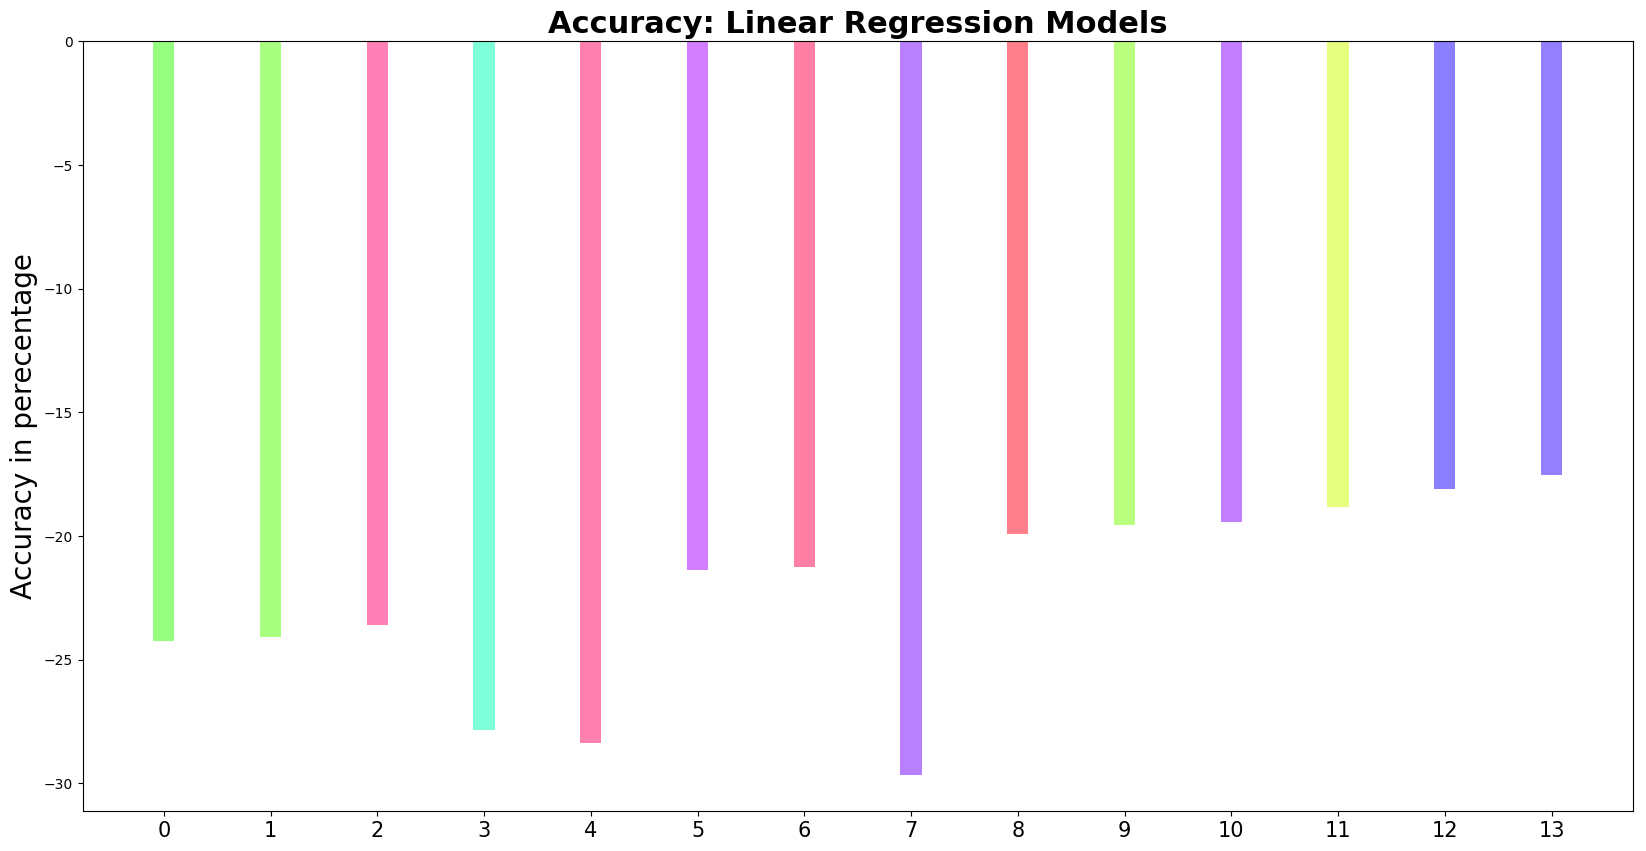

In [60]:
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(accuracy))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, accuracy))

y_pos = np.arange(len(accuracy))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (20,10))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.2, color = colors)
plt.xticks(y_pos, list(range(0,15)), fontsize = 15)
plt.ylabel('Accuracy in perecentage', fontsize=20)
plt.title('Accuracy: Linear Regression Models', fontsize=22, fontweight='bold')
plt.show()

# Question

# Use RMSE instead of r2score?